# TITANIC PROJECT

This project is about to predict if the passengers of the Titanic are going to survive or not. It is a classification problem.

## Environment

In [1]:
##### DATESET #####
import pandas as pd
import numpy as np

##### VISUALIZATION #####
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### NOTEBOOK SETTINGS #####
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import and  Data extraction

### Import Dataset

The fist step is to import the data and create a dataset with the train data of the passengers of the titanic.

In [2]:
df = pd.read_csv('Data/train.csv')

## Preprocess of the Dataset

### Problem Study

The **problem** we are going to study in this project is the prediction on the survival or not of a given number of passengers, using the peronal and travel information of the passenger. <br>

The taget Variable is **Survived**.<br>

The rest of the variables we will use for the prediction are the Id, the Class, the Name, Sex, Age of the passenger, the number of Siblings and Spouses, the nomber of Parents and childs, the ticket number, the Fare, the cabin number and the port of embark.

### Analysis of the DataSet

We check the head and tail of the dataset to start the visual and general esploration of the data.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We check the shape of the dataset, to know the number of rows and columns.

In [5]:
df.shape

(891, 12)

We have 891 rows and 12 columns

We check the type for each columns.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We have 12 variables, divided on the following types:<br>
    * 5 numerical
    * 7 categorical
But some of the numerical dtypes really are categorical.

### Change of Format of the vars

Eventhough the dtypes gives us the types of the columns, the Variables really have different categories.

#### PassengerId: int64

The **PassengerId** is a number type, the var is a **categorical:nominal** var that gives a unique identificator to each passenger.<br>
We will keep the dtype:int46<br>
Then we will make the index of the dataset in the last step of the Preprocessing.

#### Survived: int64


In [8]:
df.Survived.unique()

array([0, 1])

The **Survived** is a number type, the var is a **categorical:nominal:boolean** var that is a 1 if the passenger survived and a 0 in the passenger deceased.<br>
We will keep the dtype:int64.<br>
**This is the TARGET var**

#### Pclass: int64

In [9]:
df.Pclass.unique()

array([3, 1, 2])

The **Pclass** is a number type, but really is a **categorical:ordinal** var 1 is Fist, 2 is Seccond and 3 is Third.<br>
We will keep the dtype:int64.<br>
In future steps we will indicate that 1 is better than 2 and 3.

#### Name: object

The **Name** is an object type, it is a string, so a **categorical:ordinal** with the name of the passenger<br>
We will keep the dtype:object.<br>

#### Sex: object

In [10]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

The **Sex** is an onject type, is a **categorical:ordinal** for male and females.
We will keep the dtype:object<br>


#### Age: float64

In [11]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

The **Age** is an float type, is a **Numerical:continous** of the Age.<br>
I could seem a priori that we can conver to integuer, but we have decimal ages in the values.<br>
We will keep the dtype:float64<br>

#### SibSp: int64

In [12]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

The **SibSp** is an integer type, is a **Numerical:discreate** of the number of Sibling and Spouses.<br>
We will keep the dtype:int64<br>

#### Parch: int64

In [13]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

The **Parch** is an integer type, is a **Numerical:discreate** of the number of Parent and Children.<br>
We will keep the dtype:int64<br>

#### Ticket: object

The **Ticket** is an object type, is a **Cateforical:nominal** var with the Ticket number<br>
We will keep the dtype:object<br>

#### Fare: float64

The **Fare** is an float type, is a **Numerical:continous** of the fare payed by passenger.<br>
We will keep the dtype:float64<br>

#### Cabin: object

The **Cabin** is an object type, is a **Categorical:nominal** of the number of Cabin in the Titanic.<br>
We will keep the dtype:object<br>

#### Embarked: object

In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

The **Embarked** is an object type, is a **Categorical:nominal** of the port of embark of the passenger.<br>
We will keep the dtype:object<br>

#### Wrapping up: Variables Types

The summary of the types of variables that we have in this dataset are:

**NUMERICAL**<br>
* Discreate: SibSp,Parch<br>
* Coninous: Fare, Age<br>

**CATEGORICAL**<br>
* Nominal: Embarked, PassengerId, Survived(target), Name, Sex, Ticket, Cabin<br>
* Ordinal: Pclass<br>

### Nans Treatment

We check the number of Nulls for each column:

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 3 columns with Nans: <br>
    * Age: 177
    * Cabin: 687
    * Embarked: 2

#### Age

In the column Age we found 177 Nans

In [16]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
print(f'The percentage of Nans in the Age column is: {round((df.Age.isnull().sum()/df.shape[0])*100,2)}%')


The percentage of Nans in the Age column is: 19.87%


Enthough the number is close to the 20%, we will try to infer the age of the passenger in the EDA step of the project

#### Cabin

In [18]:
print(f'The percentage of Nans in the Cabin column is: {round((df.Cabin.isnull().sum()/df.shape[0])*100,2)}%')


The percentage of Nans in the Cabin column is: 77.1%


In [19]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The values of the Cabin as they are do not give us information, but we will keep the column to create a new column in Feature Construction.

#### Embarked

Embarked has only 2 missing values, that we will try to search and complete during the EDA, as the embarked port is a data about the passenger easy to find on the internet as there are only 3 possibilities.

In [20]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### DROP COLUMNS AND ROWS

#### DROP COLUMNS

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will only delete the **PassengerId** after using the column to be the index of the Dataset.

In [22]:
df.set_index('PassengerId', inplace=True)

In [23]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### DROP DUPLICATE ROWS

We check for duplicate rows.

In [24]:
df.duplicated().sum()

0

We do not find any duplicate row.

### Export Dataset for the EDA

In [25]:
df.to_csv('Data/df2.csv', index=False)

## EDA

Import the dataset

In [26]:
df2 = pd.read_csv('Data/df2.csv')

In [27]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Numeric Variables

First we analyze the numeric vars

In [28]:
# Variables a analizar
num_var = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']


We take only the numeric and use a dataframe 2.1

In [29]:
df21 = df2[num_var]

In [30]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [31]:
df21.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df21.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [33]:
df21.isnull().sum() / len(df2)*100

Survived     0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
dtype: float64

La variable Age es la unica que contiene valores nulos. Esta variable contiene un 19.86% (177) de valores faltantes 

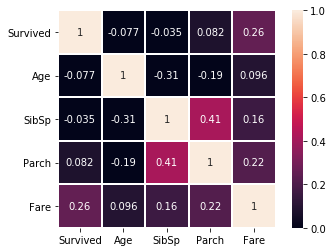

In [34]:
df21_corr = df21.corr()

sns.heatmap(df21_corr, vmin=0, vmax=1, annot=True, linewidths=1, square=True)
plt.show()

No hay variables numericas con correlación alta

#### Variable Age

In [35]:
pd.cut(df21.Age.dropna(), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).value_counts()


(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
(80, 90]      0
Name: Age, dtype: int64

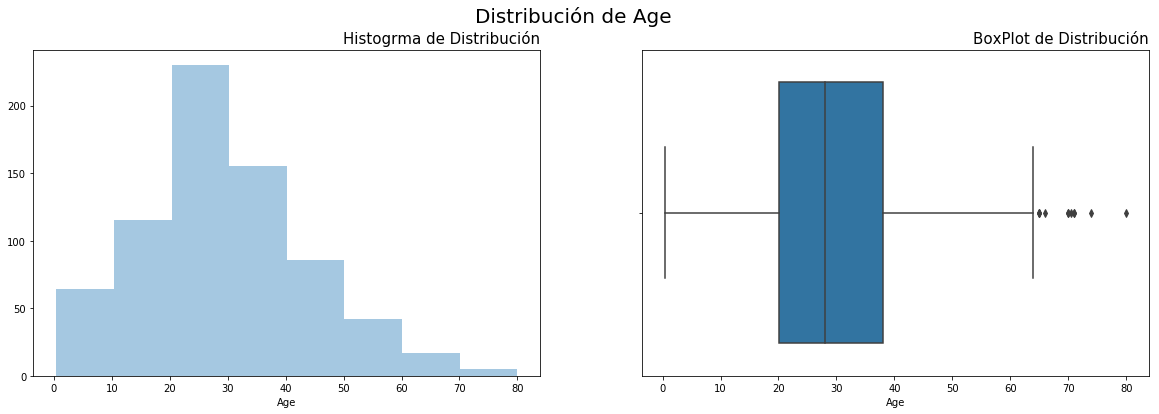

In [36]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Age', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.Age[df21.Age.isnull() == False], hist=True, kde=False, rug=False, bins=8 )


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df2.Age[df21.Age.isnull() == False])
plt.show()

#### Variable SibSp (siblings / spouses)

Percent of siblings / spouses by value

In [37]:
df21.SibSp.value_counts() / len(df2)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

El 68% de los pasajeros viaja sin hermanos ni esposos <br>
El 91.7% de los pasajeros representan a pasajeros que vijan con 1 o menos hermanos / esposos


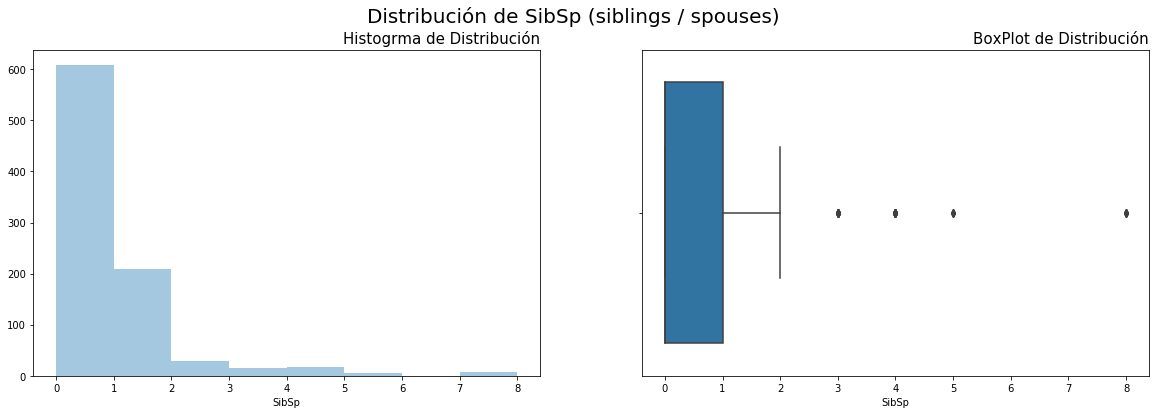

In [38]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de SibSp (siblings / spouses)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.SibSp, hist=True, kde=False, rug=False, bins=8)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df21.SibSp)
plt.show()

#### Variable Parch (parents / children)

Percent of Parch (parents / children) by value

In [39]:
df21.Parch.value_counts() / len(df21)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

El 76% de los pasajeros viaja sin padres ni hijos <br>
El 89.2% de los pasajeros representan a pasajeros que vijan con 1 o menos  padres / hijos


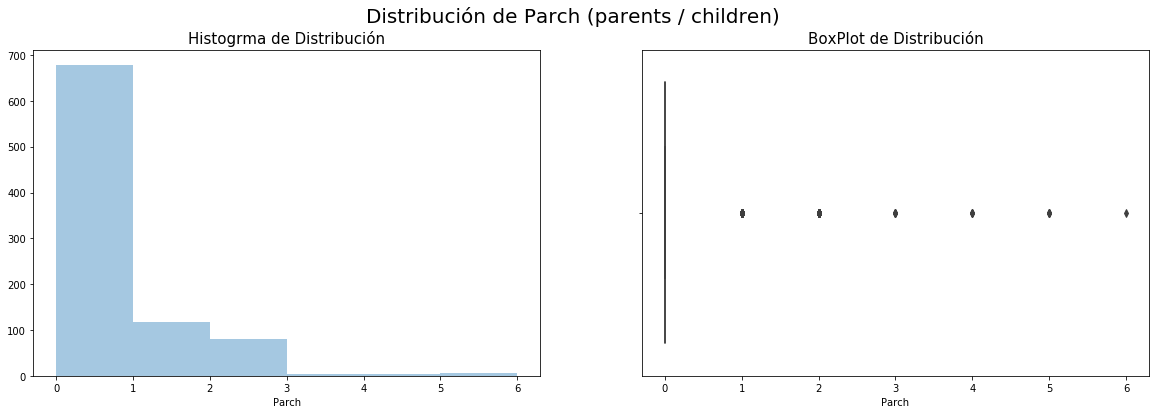

In [40]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Parch (parents / children)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df21.Parch, hist=True, kde=False, rug=False, bins=6)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df21.Parch)
plt.show()

#### Variable Fare

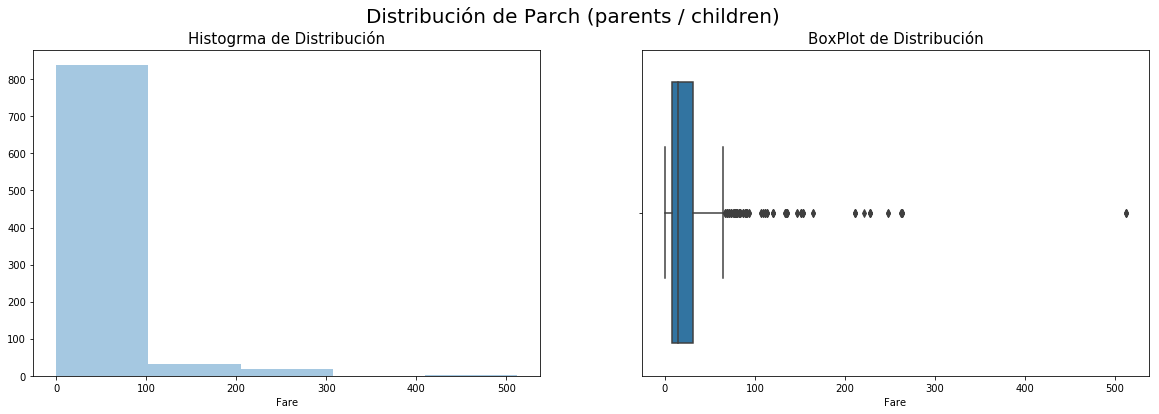

In [41]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Parch (parents / children)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df21.Fare, hist=True, kde=False, rug=False, bins=5)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df21.Fare)
plt.show()

### Categorical Variables

EDA for categorical variables

In [42]:
df22 = df2.copy()

#### Type of variables and nulls

In [43]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Only embarked and Cabin have NaNs

#### Analysis: Target Variable - Survived

First we analize the target var

In [44]:
df22.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Variable is numeric and has no NaN**

Aprox. 61.61% Did not survive (0)

Aprox. 38.38% Did survive (1)

#### Analysis: Rest of Categorical Variables

Now we analize the rest of the categorical variables

#### Embarked

**Nominal variable**

This is the only categorical variable that has nulls, but only two. Let's have a look at them:

In [45]:
df22.loc[df22.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


With manual data found at [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) we conclude that both women embarked in Southampton (S), so we manually change these entries

In [46]:
df22.Embarked[df22.Embarked.isna()] = 'S'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df22.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Name

**Nominal variable**

In [48]:
# .head() is written for length issues when uploading to git, but the full series has been explored.
df22.Name.value_counts().head()

Coutts, Master. Eden Leslie "Neville"    1
Lindqvist, Mr. Eino William              1
Hart, Miss. Eva Miriam                   1
Murdlin, Mr. Joseph                      1
Abbing, Mr. Anthony                      1
Name: Name, dtype: int64

#### Cabin

**Nominal variable**

In [49]:
# .head() is written for length issues when uploading to git, but the full series has been explored.
df22.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
C22 C26            3
F33                3
E101               3
F2                 3
B28                2
C124               2
C92                2
F G73              2
C125               2
E44                2
C68                2
D33                2
C93                2
C2                 2
E24                2
C123               2
B5                 2
F4                 2
B20                2
C83                2
B35                2
E8                 2
E25                2
B77                2
B22                2
B18                2
C52                2
E67                2
D26                2
B49                2
E33                2
B58 B60            2
C65                2
C126               2
C78                2
D36                2
B57 B59 B63 B66    2
D17                2
D20                2
E121               2
B51 B53 B55        2
D35                2
B102               1
B80          

For the cabin variable, the important thing for classification matters is the letter, so we will strip the rest in the 'Feature transformation' user story, bearing in mind that there are a lot of missing values.

#### Sex

**Nominal variable**

In [50]:
df22.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Only males and females. No nulls. 

This variable is quite clean.

#### Ticket

**Nominal variable**

In [51]:
#.head() is written for length issues when uploading to git, but the full series has been explored.
df22.Ticket.value_counts(normalize=False).head()

1601        7
CA. 2343    7
347082      7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

There are repeated values. We believe they belong to the same families, but try to demonstrate it

In [52]:
df22.loc[df22.Ticket == '347077']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
182,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
233,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
261,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S


This column is quite messy, with a lot of values.
Some pattern can be infered for 1st class passengers:

In [53]:
df22[df22.Pclass == 1].tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* WEP (WEP - WE/P) 
* PC
* Only number

For 2nd class passengers:

In [54]:
df22[df22.Pclass == 2].tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
866,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


* CA (multiple formats)
* SC (multiple formats)
* SO (multiple formats)
* Only number

For 3rd class passengers:

In [55]:
df22[df22.Pclass == 3].tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


* CA (multiple formats)
* SP (multiple formats)
* AC (multiple formats)
* SO (multiple formats)
* SOTON (multiple formats)
* STON (multiple formats)
* Only number

**We will manage these issues in the feature creation/transformation section, although there is only a clear pattern for 1st class passengers**

#### Pclass

**Ordinal variable**

In [56]:
df22.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

There are no nulls. Clean values.


We will try to change the values later as, counterintuitively, 3 in this particular case is worse than 1

#### Export 

In [57]:
df22.to_csv('Data/df3.csv', index=False)

## Feature Engineering

### Import dataset

In [59]:
df4 = pd.read_csv('Data/df3.csv')

In [60]:
df4.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Engineering of Age

- Feature 1 - Complete missing values with the mean __(Age_mean)__
- Feature 2 - Keep the Null's __(Age_null)__
- Feature 3 - Is grater than 18 __(Age_greaterThan_18)__
- Feature 4 - Is grater than 60 __(Age_greaterThan_60)__
- Feature 5 - Bins __(Age_bins)__

#### Feature 1 - (Age_mean)

In [61]:
df4['Age_mean'] = df4['Age']
df4['Age_mean'] = df4['Age_mean'].fillna(round(df4['Age'].mean(),0))

#### Feature 2  - (Age_null)
Keep the missing values as null

In [62]:
df4['Age_null'] = df4['Age']

#### Feature 3 - (Age_greaterThan_18)
Peoples with Age greater than or equal to 18 is "1" and less than 18 "0"

In [63]:
df4['Age_plus_18'] = np.where(df4.Age >= 18, 1,0)

#### Feature 4 - (Age_greaterThan_50)
Peoples with Age greater than or equal to 60 is "1" and less than 18 "0"

In [64]:
df4['Age_plus_50'] = np.where(df4.Age >= 50, 1,0)

#### Feature 5 - (Age_bins)
Create 5 bins of Age 
1. __Child__ (0 to 13)
2. __Teen__ (14 to 18)
3. __Adult__ (19 to 45)
4. __Old__ (46 to 80)
5. __Unknown__ (Missing Values)


In [67]:
bins = pd.cut(df4.Age, [0, 13, 18, 45, 80], labels=['Child', 'Teen', 'Adult', 'Old'])
df4['Age_bins'] = np.where(bins.isnull(),'Unknown',bins)

#### Feature 5 - (Drop Age)

In [68]:
df4.drop(columns='Age', inplace=True)

In [69]:
df4.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_null,Age_greaterThan_18,Age_greaterThan_50,Age_bins
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1,0,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0,38.0,1,0,Adult
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,1,0,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0,35.0,1,0,Adult
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0,35.0,1,0,Adult


### Feature Engineering of Cabin

We will preserve only the letter

In [70]:
def cabinextractor(string):
    """
    Takes whatever is not a letter out of the string.a
    """
    import re
    try:
        clean = re.sub("[^a-zA-Z]", "", string)
        if len(clean) > 1:
            return clean[0]
        else:
            return clean
    except:
        pass

In [71]:
df4.Cabin = df4.Cabin.apply(cabinextractor)

In [72]:
df4.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_null,Age_greaterThan_18,Age_greaterThan_50,Age_bins
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,None,S,22.0,22.0,1,0,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,C,38.0,38.0,1,0,Adult
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,None,S,26.0,26.0,1,0,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,S,35.0,35.0,1,0,Adult
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,None,S,35.0,35.0,1,0,Adult


In [73]:
df4.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

### Feature Engineering of Name

We will get the length of the string containing the name to check if it correlates with mortality:

In [ ]:
df4.Name = df4.Name.apply(lambda x:len(x))

### Feature Engineering of Ticket 

Similarly to what was done with the cabins, we will extract the letters for the ticket, to check if there is a pattern or a majoritary group:

In [79]:
def ticketextractor(string):
    """
    Takes whatever is not a letter out of the string.a
    """
    import re
    try:
        clean = re.sub("[^a-zA-Z]", "", string)
        return clean
    except:
        pass

In [80]:
# Getting the letters from the ticket:
df4.Ticket = df4.Ticket.apply(ticketextractor)

# Extracting Top5 Categories:
top5 = df4.Ticket.apply(ticketextractor).value_counts().head()

There are two main groups with letters in ticket, PC and CA. We will classify this variable as Number (only numeric ticket), PC, CA, or other.

We replace the empty string with 'Numeric', get PC and CA as classes and the rest will be codified as 'Other':

In [82]:
# Empty string as 'Numeric'
df4.loc[df4.Ticket == '', 'Ticket'] = 'Numeric'

# Grouping Top3 categories in a list:
top5 = df4.Ticket.apply(ticketextractor).value_counts().head()
top3 = top5.nlargest(3).index

# All remaining rows will be set to 'Other'
df4.Ticket = df4.Ticket.where(df4.Ticket.isin(top3), other='Other')

In [83]:
df4.to_csv('Data/df4.csv', index=False)